# Data Mining Lab 9
- Using the clustering techniques from Unsupervised Learning
- Citation: refer to the data mining sample project

## Intorduction:

1. Context
    - analyses such as customer segmentation, identifying patterns in customer behavior, predicting customer churn, or optimizing customer service strategies

2. Objective
    - To perform an exploratory data analysis and cluster the products based on various factors
    - Extracting insights and opinion-mining from the dataset and answering the key questions  

3. Key Questions
    - Which variables are most important for clustering?
    - How each cluster is different from the others?
    - What are the business recommendations?

4. Data Description
    - **The dataset Customer.csv**: with the following features: 

Sl_No: Primary key of the records
Customer Key: Customer identification number
Average Credit Limit: Average credit limit of each customer for all credit cards
Total credit cards: Total number of credit cards possessed by the customer
Total visits bank: Total number of visits that customer made (yearly) personally to the bank
Total visits online: Total number of visits or online logins made by the customer (yearly)
Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

In [55]:
!pip install yellowbrick

In [56]:
# general libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# data visualization libraries  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings 
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [57]:
data = pd.read_csv("Customer.csv")

In [58]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

## EDA 
### Basic Data Exploration

In [59]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [60]:
df.shape

(660, 7)

In [61]:
# A DataFrame is a 2-D type of dataset since it contains rows and columns only.
# dimensionality reduction refers to reducing the number of the columns
# dimensionality reduction plays a significant role in data segmentation or clustering.
df.ndim

2

In [62]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [63]:
# let's check for duplicate observations
df.duplicated().sum()

0

In [64]:
# let's look at the data inforamtion 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [65]:
# let's get the statistical summary of the numeric values
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [66]:
# let's get a summary of the object variables
df.describe(include=['int64']).T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [67]:
# checking missing values
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

- There are no missing values in this dataset.

#### Univariate EDA


In [68]:
# let's check again
df.value_counts()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  Total_visits_online  Total_calls_made
1      87073         100000            2                   1                  1                    0                   1
435    52460         45000             4                   2                  1                    2                   1
437    58019         73000             4                   2                  1                    1                   1
438    87219         54000             6                   3                  0                    2                   1
439    36839         31000             7                   2                  1                    4                   1
                                                                                                                      ..
221    79632         8000              1                   0                  3                    10                  1
222    73811         7000            

In [69]:
# let's examine variable using loc indexter 
df1 = df.loc[:, 'Sl_No':'Total_calls_made']

In [70]:
# let's see the first 10 highest 
df1.sort_values(by='Avg_Credit_Limit', ascending=False).head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
630,631,33837,200000,10,0,13,0
650,651,78996,195000,10,1,12,2
631,632,14916,195000,8,0,15,0
632,633,97935,187000,7,1,7,0
646,647,58392,186000,7,0,8,1
639,640,90839,184000,7,1,15,2
647,648,79953,183000,9,0,9,2
624,625,97285,178000,7,0,11,0
622,623,53916,176000,10,1,15,2
637,638,88442,173000,9,1,11,0


In [71]:
# sort the head(10) by rating decending from 5 to 1
df1.sort_values(by="Total_Credit_Cards", ascending=False).head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
649,650,30570,112000,10,1,8,1
636,637,40217,126000,10,1,8,0
630,631,33837,200000,10,0,13,0
627,628,20620,146000,10,0,12,1
641,642,27212,144000,10,0,10,2
642,643,91575,97000,10,1,9,2
623,624,32584,166000,10,0,7,0
644,645,18519,127000,10,1,15,1
645,646,48762,171000,10,0,15,0
622,623,53916,176000,10,1,15,2


#### Multivariate EDA & Visualization

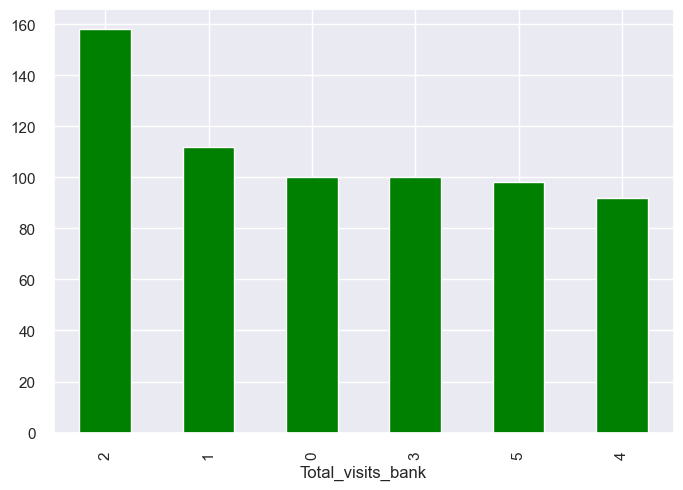

In [72]:
df['Total_visits_bank'].value_counts().plot(kind='bar', color='green');

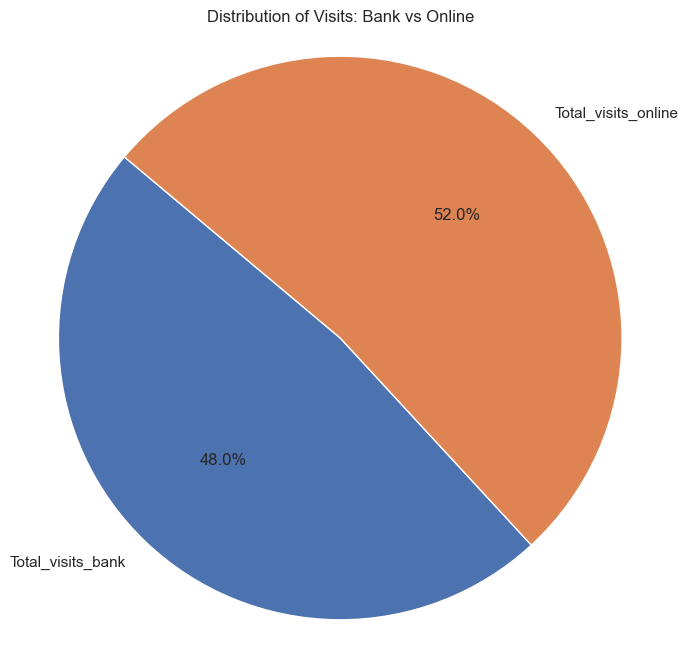

In [73]:
# Let's calculate the total number of visits to the bank in person and online
total_visits = df[['Total_visits_bank', 'Total_visits_online']].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_visits, labels=total_visits.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Visits: Bank vs Online')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

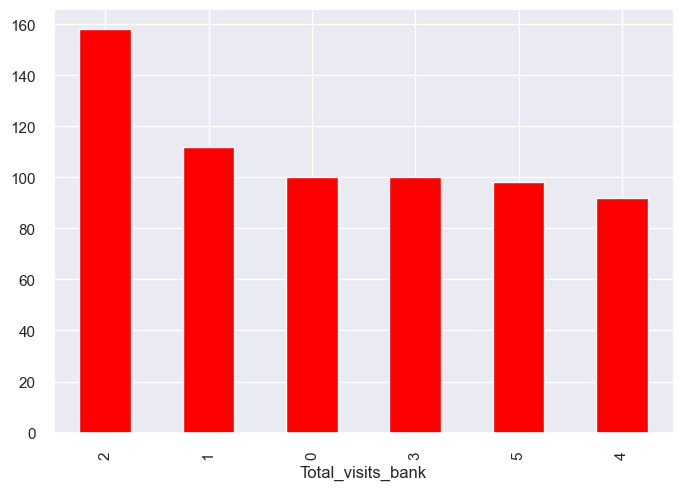

In [74]:
df['Total_visits_bank'].value_counts().plot(kind='bar', color='red'); 

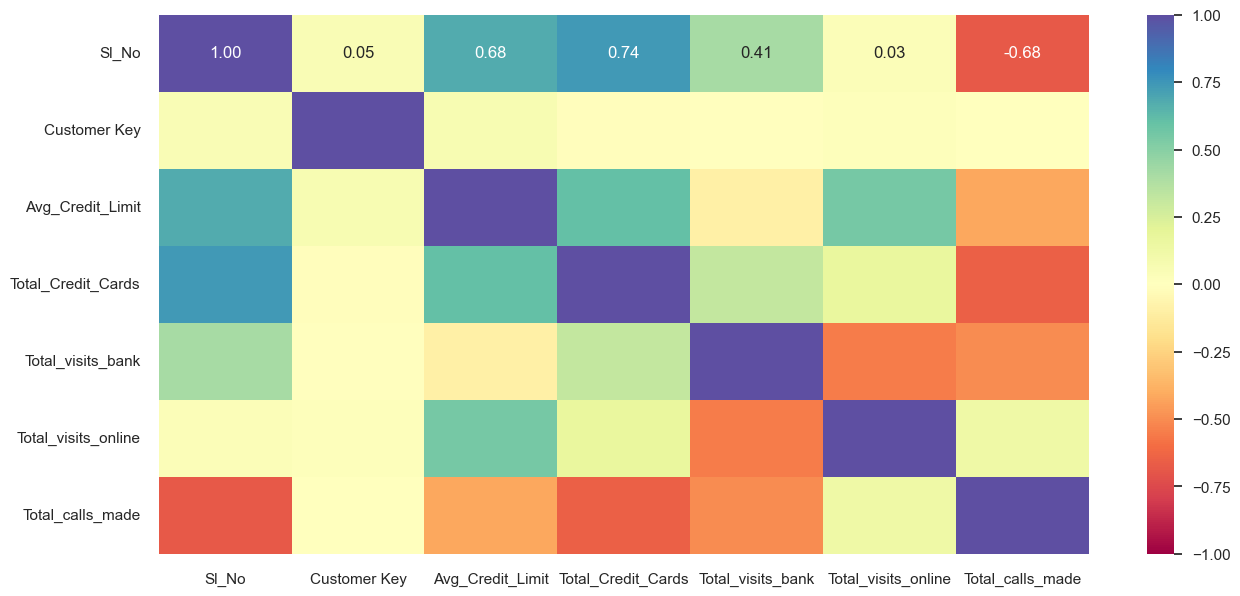

In [75]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()
# Let's check for correlations
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

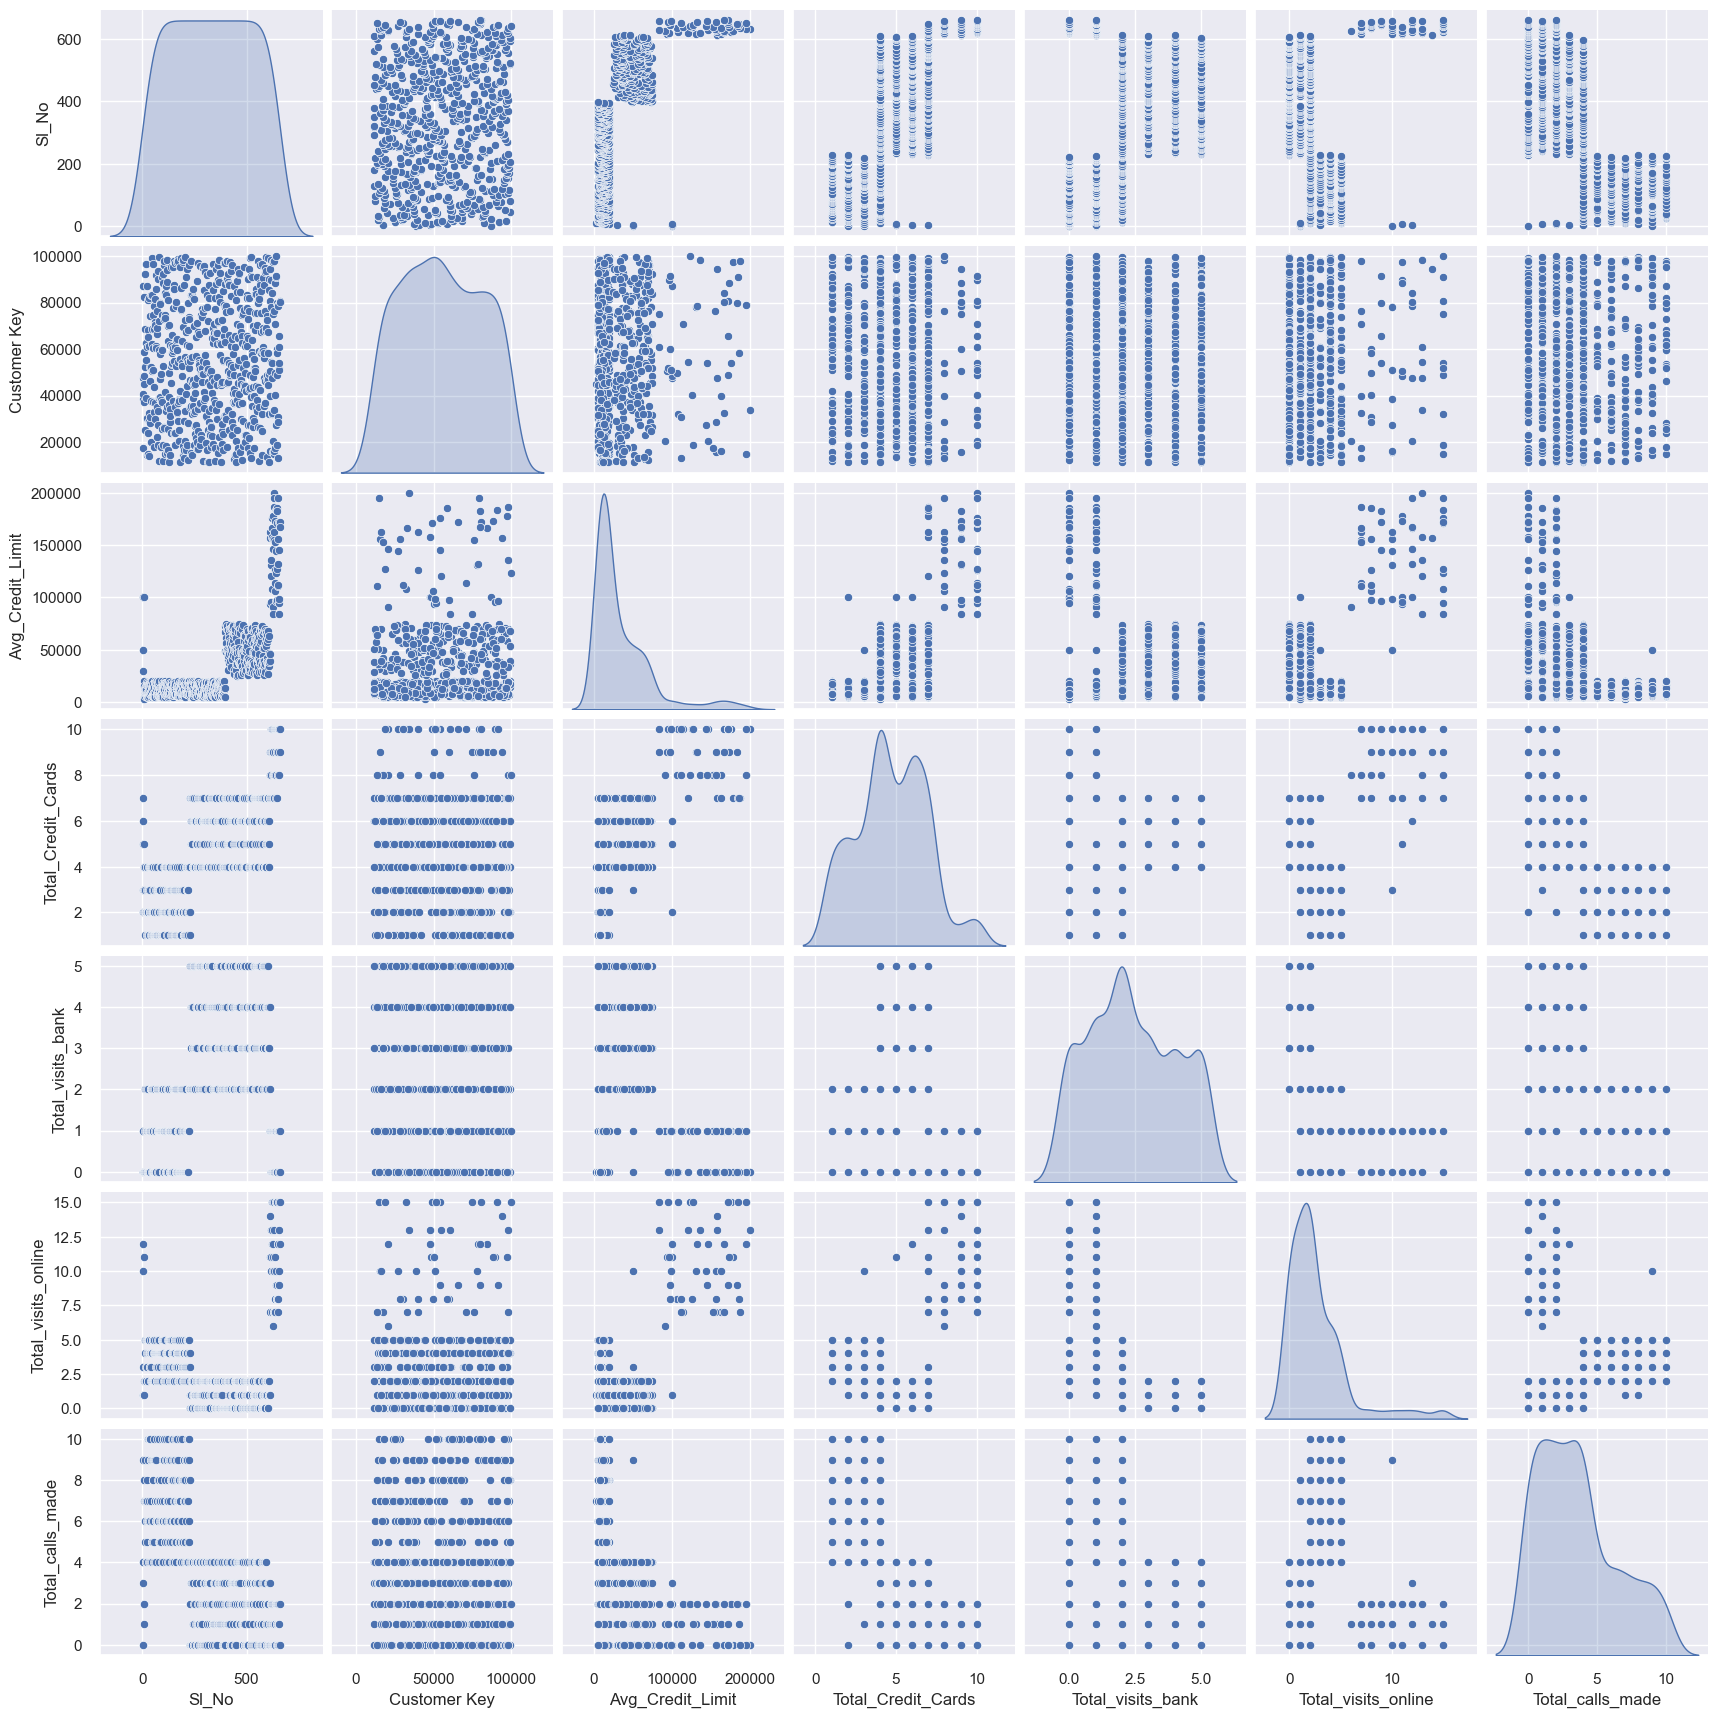

In [76]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

### Data Preprocessing

In [77]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()
# 1st, we need to choose variables that will be used in clustering
# num_col stores numerical columns
num_col

['Sl_No',
 'Customer Key',
 'Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

In [78]:
# 2nd, scaling is almost needed in any clustering project before performing clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [79]:
# 3rd, creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

### K-means Clustering

1. Finding the best value for K
2. Running the model using the best value of K
3. Creating cluster profiling  

In [80]:
clusters = range(1, 9)
# creating 8 clusters
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )  # cdist calculate the minimum distance using euclidena measure between data points and centroid in
        # every cluster and with the centroid of the neighboring cluster
        / subset_scaled_df.shape[0]
    )

    # distorion in k-means is defined as the sum of the squared distances between
    # each data point and the centroid within a cluster. The k-means method tries to minimize the distorion.
    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

Number of Clusters: 1 	Average Distortion: 2.4605025916536993
Number of Clusters: 2 	Average Distortion: 1.8702176539212687
Number of Clusters: 3 	Average Distortion: 1.591543445195085
Number of Clusters: 4 	Average Distortion: 1.4576499605797903
Number of Clusters: 5 	Average Distortion: 1.3679393302050025
Number of Clusters: 6 	Average Distortion: 1.306060851578396
Number of Clusters: 7 	Average Distortion: 1.2680326040930792
Number of Clusters: 8 	Average Distortion: 1.224545352379984


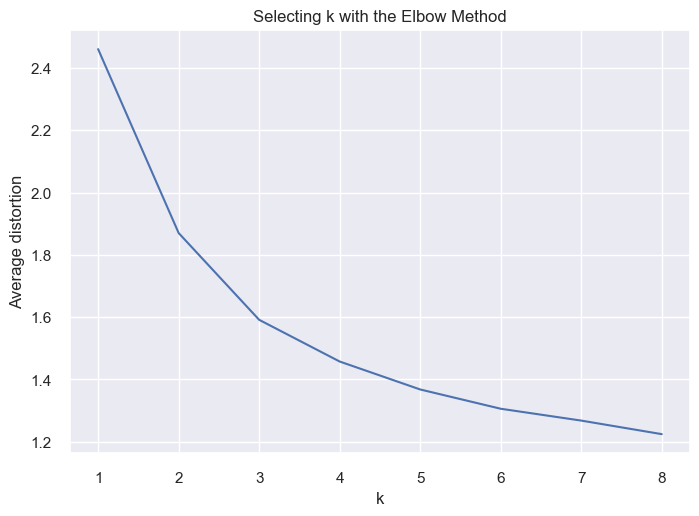

In [81]:
# plotting the elbow method: a way of choosing a value for k = number of clusters
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

### Using the KElbow Visualizer to find the best value for K 

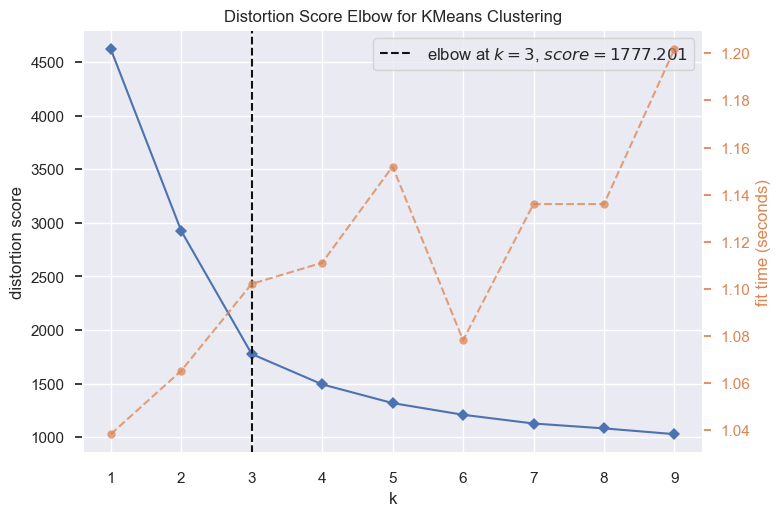

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [82]:
# let's check out the KElbow Visualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 10))
visualizer.fit(subset_scaled_df)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

### Checking the silhouette scores to find the best value for K 

For n_clusters = 2, the silhouette score is 0.37511619273402025)
For n_clusters = 3, the silhouette score is 0.44394092525170764)
For n_clusters = 4, the silhouette score is 0.324042922059886)
For n_clusters = 5, the silhouette score is 0.26655942061525423)
For n_clusters = 6, the silhouette score is 0.24520689678926602)
For n_clusters = 7, the silhouette score is 0.2299275963520106)
For n_clusters = 8, the silhouette score is 0.2297814804546279)
For n_clusters = 9, the silhouette score is 0.22108882093736687)


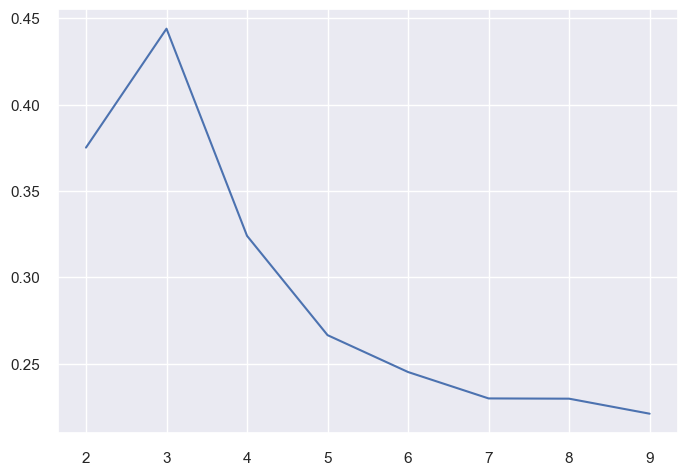

In [83]:
# let's check the silhouette visualizer out
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

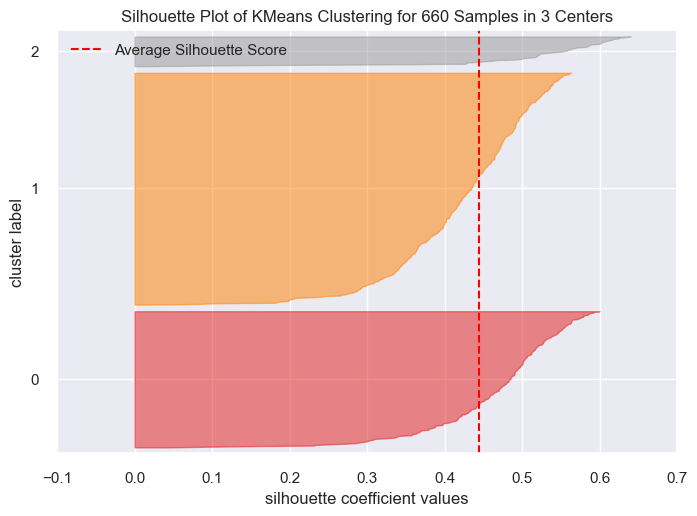

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [84]:
# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=1)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(subset_scaled_df)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

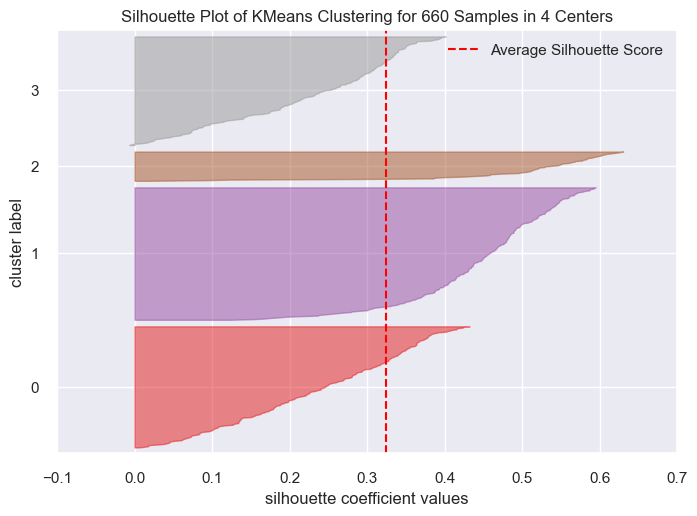

In [85]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show();

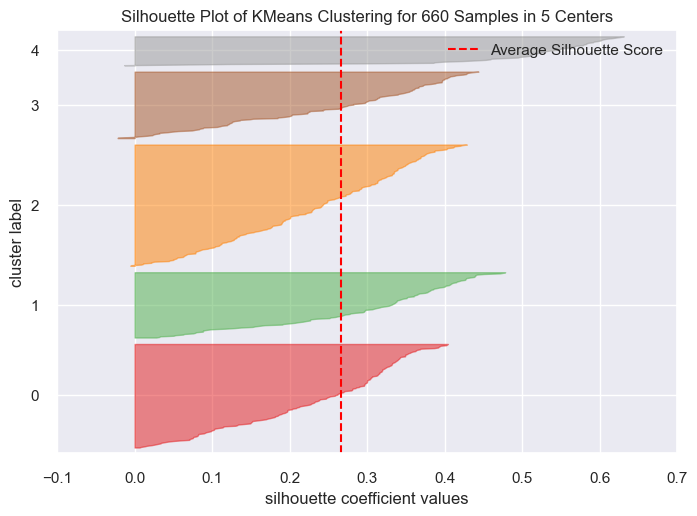

In [86]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show();

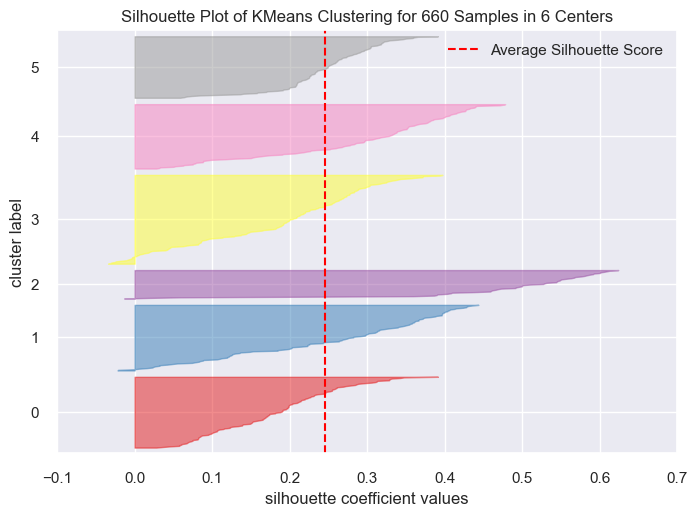

In [87]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show();

### Running the model using the best value of K

In [88]:
# let's take 4 as number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [89]:
# adding kmeans cluster labels to the original and scaled dataframes

df["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

In [90]:
# adding kmeans cluster labels to the original dataframe
cluster_profile = df.groupby("K_means_segments").mean()

In [91]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("K_means_segments")["Total_visits_bank"].count().values
)

In [92]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,,,
0,116.062780,55270.789238,12246.636771,2.408072,0.923767,3.547085,6.883408,223
1,397.150485,34516.213592,29864.077670,5.446602,3.480583,1.029126,2.033981,206
2,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,50
3,441.276243,78023.143646,38033.149171,5.580110,3.497238,0.950276,1.972376,181


In [93]:
pd.crosstab(df.K_means_segments, df.Total_visits_bank).style.highlight_max(color="lightgreen", axis=0)

Total_visits_bank,0,1,2,3,4,5
K_means_segments,,,,,,
0,80,80,63,0,0,0
1,0,1,50,56,47,52
2,20,30,0,0,0,0
3,0,1,45,44,45,46


### Conclusion
- In first part we understand our dataset
- we preprossed our data 
- we applied clustering algorithm K-means
- We find the best value for K: You used the Elbow Method, the KElbow Visualizer, and Silhouette Scores to determine the optimal number of clusters (K).
- Optimal Number of Clusters (K): Using multiple methods including the Elbow Method, the KElbow Visualizer, and Silhouette Scores, it was determined that the optimal number of clusters for this dataset is 4. This choice of K provides a balance between minimizing intra-cluster distance and maximizing inter-cluster distance.
- Cluster Profiles: After training the K-means model with 4 clusters, cluster profiles were generated by calculating the mean values of various attributes within each cluster. These profiles provide a snapshot of the characteristics and behavior of customers in each segment. Key attributes considered include average credit limit, total credit cards, total visits to the bank, total visits online, and total calls made.
- Visualization: Visualizations such as pie charts, silhouette plots, and crosstabs were utilized to enhance understanding and interpretation of the clustering results. These visualizations offer valuable insights into the distribution of variables across clusters and highlight patterns and trends.